# Assignment (5) : Multiple Linear Regression 

### Example (1) : 50_Startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Cleaning of the Data : Dropping State Column
data = data.drop('State', axis=1)
data.head(10)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
#Correlation Matrix
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


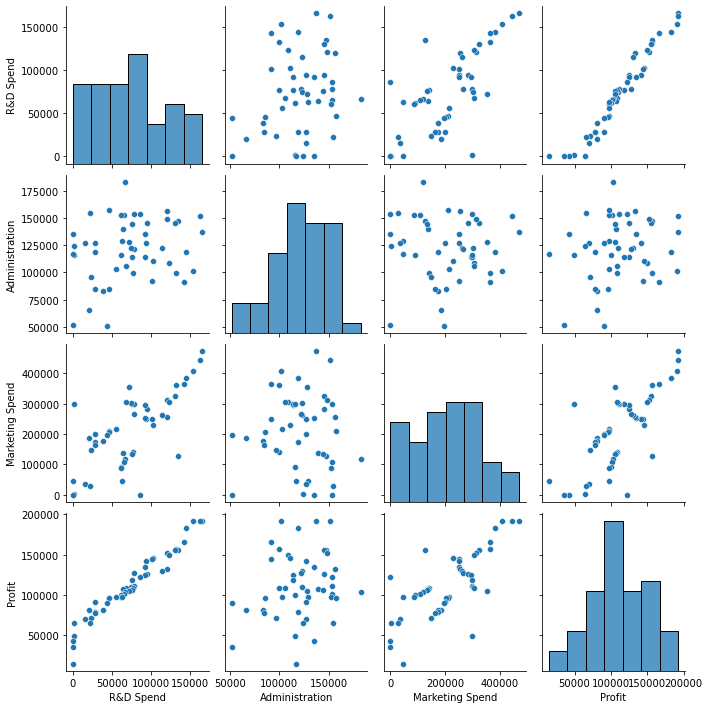

In [9]:
#Graphically understanding the relationship between the variables
sns.pairplot(data)

In [11]:
#Renaming the columns
data.rename(columns= {'R&D Spend': 'RD', 'Administration': 'AD', 'Marketing Spend': 'MS', 'Profit': 'PF'}, inplace= True)
data.head()

,RD,AD,MS,PF
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [12]:
# Model Building

import statsmodels.formula.api as smf 
model = smf.ols('PF~RD+AD+MS',data= data).fit()

In [13]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        11:31:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Simple Linear Regression Model
# Checking for 'RD' [R&D Spend] as it is having strong positive correlation of 0.97 with target variable 'PF' [Profit]

model_RD = smf.ols('PF~RD', data= data).fit()
model_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           3.50e-32
Time:                        11:31:44   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

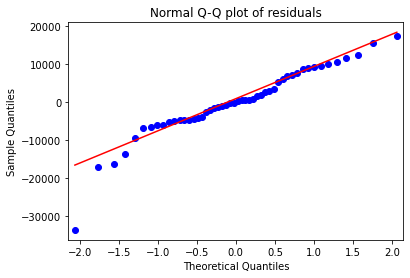

In [18]:
# model(1) is having better r-squared value than model_RD

#Residual Analysis : Test For Normality of Residuals
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid, line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

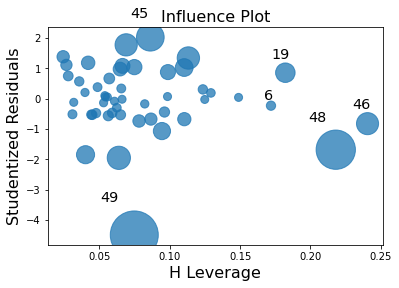

In [19]:
# Model Deletion Diagnostics

# Method (1) : High Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [20]:
# Finding Cutoff Value
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

# No Observation is beyond the cut-off value

0.30000000000000004

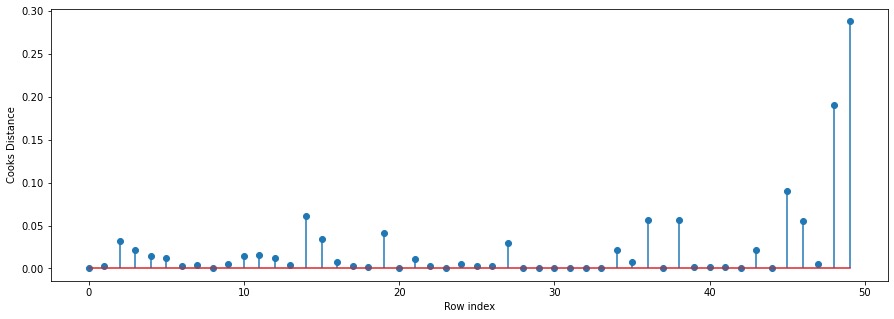

In [21]:
# Method (2) : Cook's Distance

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize=(15, 5))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [22]:
# Dropping observation number 49 for improving the accuracy of the model. Although we can keep that observation as well, since cooks distance value is less than 1 for all observations

data_1 = data.drop(data.index[[49]], axis= 0).reset_index()
data_1

data_1= data_1.drop(['index'], axis=1)   #dropping original index column
data_1

,RD,AD,MS,PF
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [23]:
# Rebuilding the improved model

final_model = smf.ols('PF~RD+AD+MS',data= data_1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PF   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           8.85e-32
Time:                        11:32:50   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
AD            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
final_model.rsquared
# r-squared value has been improved from 0.951 to 0.961. So, model has been improved

0.9613162435129847

In [25]:
# Predicting the results with final model

new_data= pd.DataFrame({'RD':12000,"AD":145000,"MS":300000},index=[1])
final_model.predict(new_data)

1    66129.35107
dtype: float64

In [26]:
final_model.predict(data_1.iloc[0:5])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64

### Example (2) : Toyota Corolla

In [27]:
car = pd.read_csv("ToyotaCorolla.csv")
car.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [28]:
car.shape

(1436, 38)

In [29]:
car.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [30]:
# Renaming the columns which have to be considered in the analysis

car.rename(columns= {'Price': 'Pr', 'Age_08_04': 'Age', 'KM': 'Km', 'HP': 'Hp', 'cc': 'Cc', 'Doors': 'Dr', 'Gears': 'Gr', 'Quarterly_Tax': 'Qt', 'Weight': 'Wt'}, inplace= True)
car

,Id,Model,Pr,Age,Mfg_Month,Mfg_Year,Km,Fuel_Type,Hp,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# Correlation Matrix
car.corr()

,Id,Pr,Age,Mfg_Month,Mfg_Year,Km,Hp,Met_Color,Automatic,Cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Pr,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
Km,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
Hp,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
Cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [32]:
# Building the model

import statsmodels.formula.api as smf 
model_c1 = smf.ols('Pr~Age+Km+Hp+Cc+Dr+Gr+Qt+Wt', data= car).fit()
model_c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pr   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:33:34   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
Km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
Hp            31.6809      2.818     11.241      0.000      26.152      37.209
Cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Dr            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gr           594.3199    197.055      3.016      0.003     207.771     980.869
Qt             3.9491      1.310      3.015      0.003       1.379       6.519
Wt            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# None of the features are having perfect positive or negative correlation with each other
# Only 'Age' independent  variable is having high negative correlation with target variable 'Price'

car['Pr'].corr(car['Age'])

-0.8765904971436398

In [34]:
# Simple Linear Regression with variable 'Age'

model_c1_age = smf.ols('Pr~Age', data= car).fit()
model_c1_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pr   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:33:44   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

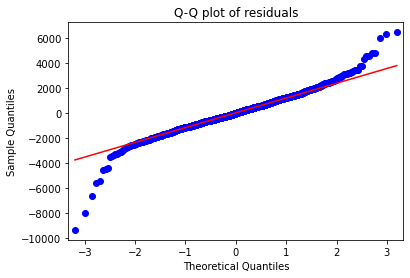

In [35]:
# model_c1 is having better r-squared value (0.86) than model_c1_age (0.768). So, selecting 'model_c1'

#Residual Analysis : Test For Normality of Residuals
import statsmodels.api as sm

qq_car= sm.qqplot(model_c1.resid, line='q') 
plt.title("Q-Q plot of residuals")
plt.show()

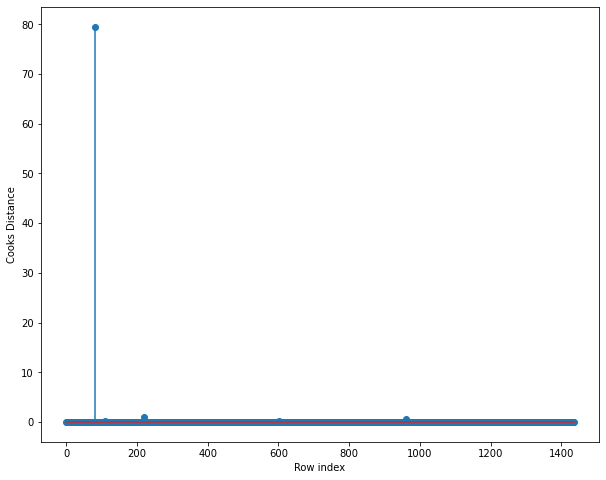

In [36]:
# Model Deletion Diagnostics

# Using Cook's Distance

model_inf = model_c1.get_influence()
(c, _) = model_inf.cooks_distance

fig = plt.subplots(figsize=(10, 8))
plt.stem(np.arange(len(car)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

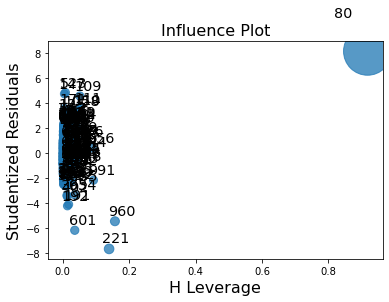

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_c1)
plt.show()

In [39]:
# Finding Cuto-off value
k = car.shape[1]
n = car.shape[0]
lev_cutoff = 3*((k + 1)/n)
lev_cutoff

0.08147632311977715

In [40]:
# Improving the model by eliminating observations 80, 221, 960

car1= car.drop(car.index[[80, 221, 960]], axis=0).reset_index()
car1

,index,Id,Model,Pr,Age,Mfg_Month,Mfg_Year,Km,Fuel_Type,Hp,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,...,1,1,1,0,1,1,1,0,0,0
1429,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,...,0,0,1,0,0,1,1,0,0,0
1430,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,...,0,0,1,0,0,0,1,0,0,0
1431,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,...,0,0,0,0,0,0,1,0,0,0


In [41]:
# Checking for the accuracy of the model

model_c2 = smf.ols('Pr~Age+Km+Hp+Cc+Dr+Gr+Qt+Wt', data= car1).fit()
model_c2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pr   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:22   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age         -112.0180      2.479    -45.185      0.000    -116.881    -107.155
Km            -0.0170      0.001    -14.160      0.000      -0.019      -0.015
Hp            36.6084      2.745     13.334      0.000      31.223      41.994
Cc            -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Dr          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gr           464.9839    180.976      2.569      0.010     109.975     819.993
Qt             5.2134      1.371      3.802      0.000       2.523       7.904
Wt            30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

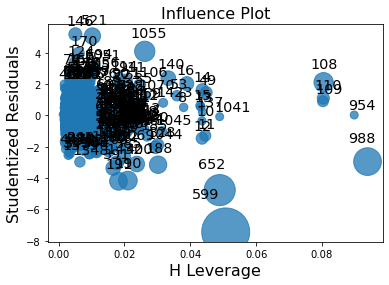

In [42]:
# r-squared value has increased from 0.864 to 0.885. So, model has been improved

# Analysing if more outliers are present in the data
influence_plot(model_c2)
plt.show()

In [43]:
# Finding Cuto-off value
k1 = car1.shape[1]
n1 = car1.shape[0]
lev_cutoff_2 = 3*((k1 + 1)/n1)
lev_cutoff_2

0.0837404047452896

In [44]:
# Improving the model further by eliminating observations 954 & 988

car2= car1.drop(car1.index[[954, 988]], axis=0).reset_index()
car2

,level_0,index,Id,Model,Pr,Age,Mfg_Month,Mfg_Year,Km,Fuel_Type,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,...,1,1,1,0,0,0,1,0,0,0
1,1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,...,1,0,1,0,0,0,1,0,0,0
2,2,2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,...,0,0,1,0,0,0,1,0,0,0
3,3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,...,0,0,1,0,0,0,1,0,0,0
4,4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,1428,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,...,1,1,1,0,1,1,1,0,0,0
1427,1429,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,...,0,0,1,0,0,1,1,0,0,0
1428,1430,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,...,0,0,1,0,0,0,1,0,0,0
1429,1431,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,...,0,0,0,0,0,0,1,0,0,0


In [45]:
# Checking for the accuracy of new model

model_c3 = smf.ols('Pr~Age+Km+Hp+Cc+Dr+Gr+Qt+Wt', data= car2).fit()
model_c3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pr   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1379.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:48   Log-Likelihood:                -12205.
No. Observations:                1431   AIC:                         2.443e+04
Df Residuals:                    1422   BIC:                         2.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.406e+04   1466.170     -9.591      0.000   -1.69e+04   -1.12e+04
Age         -111.7728      2.475    -45.157      0.000    -116.628    -106.917
Km            -0.0170      0.001    -14.168      0.000      -0.019      -0.015
Hp            37.2399      2.756     13.513      0.000      31.834      42.646
Cc            -3.8169      0.302    -12.656      0.000      -4.409      -3.225
Dr          -131.4822     37.546     -3.502      0.000    -205.133     -57.832
Gr           280.0522    199.228      1.406      0.160    -110.760     670.864
Qt             5.1753      1.368      3.782      0.000       2.491       7.859
Wt            30.8675      1.290     23.927      0.000      28.337      33.398
==============================================================================
Omnibus:                      123.397   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.355
Skew:                          -0.079   Prob(JB):                    1.14e-158
Kurtosis:                       6.489   Cond. No.                     3.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

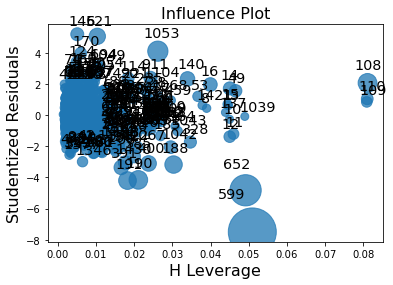

In [46]:
# r-squared value has increased from 0.885 to 0.886. So, model has been improved

# Analysing if more outliers are present in the data
influence_plot(model_c3)
plt.show()

In [47]:
# Finding Cuto-off value
k2 = car2.shape[1]
n2 = car2.shape[0]
lev_cutoff_3 = 3*((k2 + 1)/n2)
lev_cutoff_3

0.0859538784067086

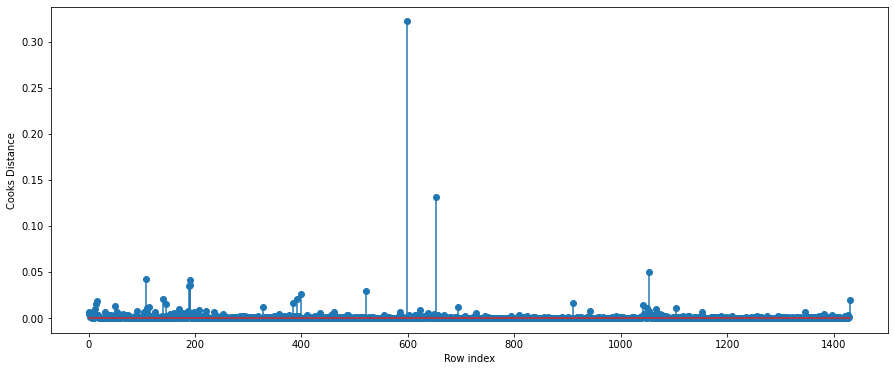

In [48]:
# Using Cook's Distance Method

model_inf1 = model_c3.get_influence()
(c, _) = model_inf1.cooks_distance

fig = plt.subplots(figsize=(15, 6))
plt.stem(np.arange(len(car2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
# Since Maximum Cook's distance value is less than 1, we can stop diagnostic process

corolla_model = smf.ols('Pr~Age+Km+Hp+Cc+Dr+Gr+Qt+Wt', data= car2).fit()
corolla_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Pr   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1379.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:35:13   Log-Likelihood:                -12205.
No. Observations:                1431   AIC:                         2.443e+04
Df Residuals:                    1422   BIC:                         2.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.406e+04   1466.170     -9.591      0.000   -1.69e+04   -1.12e+04
Age         -111.7728      2.475    -45.157      0.000    -116.628    -106.917
Km            -0.0170      0.001    -14.168      0.000      -0.019      -0.015
Hp            37.2399      2.756     13.513      0.000      31.834      42.646
Cc            -3.8169      0.302    -12.656      0.000      -4.409      -3.225
Dr          -131.4822     37.546     -3.502      0.000    -205.133     -57.832
Gr           280.0522    199.228      1.406      0.160    -110.760     670.864
Qt             5.1753      1.368      3.782      0.000       2.491       7.859
Wt            30.8675      1.290     23.927      0.000      28.337      33.398
==============================================================================
Omnibus:                      123.397   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.355
Skew:                          -0.079   Prob(JB):                    1.14e-158
Kurtosis:                       6.489   Cond. No.                     3.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Data Prediction

car_predict = pd.DataFrame({'Age':50,'Km':55000,'Hp':100,'Cc':1500,'Dr':4,'Gr':4.5,'Qt':80,'Wt':1050}, index=[1])

In [51]:
corolla_model.predict(car_predict)

1    10974.603787
dtype: float64

In [52]:
corolla_model.predict(car2.iloc[:10])

0    16341.610559
1    15901.414620
2    16319.315376
3    15989.092109
4    15857.483139
5    15252.279472
6    17556.062701
7    17538.334712
8    20967.288938
9    13550.148865
dtype: float64